# Macro HW1

First we import packages that will be used later.

In [1]:
%matplotlib inline
from scipy import stats
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt

Question (a):

Under usual regularity, $$\alpha_1 \rightarrow \frac{cov(c,y)}{var(y)}=\frac{var(p)}{var(p)+var(\xi)}$$

Therefore, if farmer has higher transitory variance, ($var(\xi)$), its estimated coefficient will be lower than others. Of course, it also depends on the level of $var(p)$.

For the following simulation, we simply assum all random variable are normal distributed with mean 0 as the coefficient only depends on second moments of $y$ and $c$.

We define a function that gives income and consumption of a group of 50 people under the "permanent income hypothesis".

In [2]:
def income(sigma_p,sigma_e):
    p=sigma_p*np.random.randn(50)
    e=sigma_e*np.random.randn(50)
    c=p
    y=p+e
    return (y,c)

Nothing new, just the homework requirement.

In [3]:
(sigma_p_nonfarm,sigma_e_nonfarm)=(math.sqrt(0.01),math.sqrt(0.02))

The core for question (a). Here it construct the economy with two groups equipped with different income variances and then plot the regression (not easy to adjust the graph format).

In [4]:
def esti(a,b):

    (sigma_p_farm,sigma_e_farm)=(math.sqrt(a)*sigma_p_nonfarm,math.sqrt(b)*sigma_e_nonfarm)
    famer=income(sigma_p_farm,sigma_e_farm)
    nonfamer=income(sigma_p_nonfarm,sigma_e_nonfarm)
    
    x,y=famer
    fig, ax = plt.subplots()
    slope, intercept, r_value, p_value, std_err= stats.linregress(x,y)
    
    ax.plot(x, slope * x +intercept, color='red', label='farmer reg')    
    ax.scatter(x, y, color='blue', label='farmer')
    x,y=nonfamer
    #fig, ax = plt.subplots()
    slope2, intercept2, r_value, p_value, std_err= stats.linregress(x,y)
    ax.plot(x, slope2 * x +intercept2, color='green', label='nonfarmer reg')
    ax.scatter(x, y, color='purple', label='nonfarmer')
    ax.plot(x,   x , color='yellow', label='45% line')
    ax.legend(loc='upper left')
    plt.xlabel('income')
    plt.ylabel('consumption')
    plt.show()
    
    print "farmer's estimated function is {a}+({b})*x\nnon-farmer is {a2}+({b2})*x".format(
        b=slope,a=intercept,b2=slope2,a2=intercept2 )

In [5]:
def senario(n):
    if n==1:
        a=1
        b=3
    if n==2:
        a=10
        b=3
    if n==3:
        a=0.1
        b=3
    esti(a,b)

Question a (i)

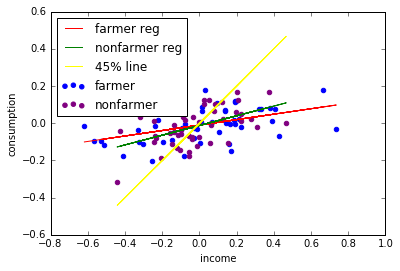

farmer's estimated function is -0.0101258785408+(0.146552219917)*x
non-farmer is -0.0123336587319+(0.260859023042)*x


In [6]:
senario(1)

Question a (ii)

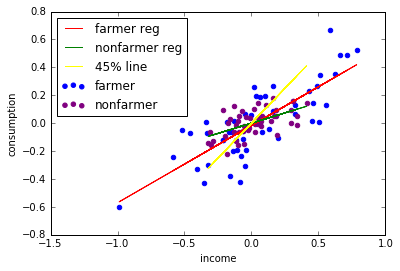

farmer's estimated function is -0.0161247055032+(0.554222235068)*x
non-farmer is 0.000394002285423+(0.293985797362)*x


In [8]:
senario(2)

Question a (iii)

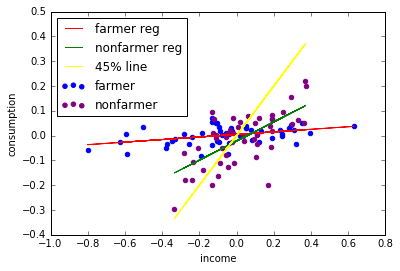

farmer's estimated function is 0.00477041934363+(0.0516212629565)*x
non-farmer is -0.0219230852386+(0.384930644705)*x


In [9]:
senario(3)

According to formula, we expect to see $\alpha_1$ is close to 
$\frac{1}{7}=0.14, \frac{5}{8}=0.625, \frac{1}{61}=0.016$ for case (i), (ii), (iii).
What we have seen for the estimation are $0.156, 0.68, 0.026$.
$\alpha_1$ indeed increases as $var(\xi)$ decreases more relatively to $var(p)$.

Question (b):

Under Permanent Income Hypothesis, saving rate is supposed to be negative correlated with income growth as income is serial independent, which mean high income (high saving rate) for this period implies low income growth because expected next period's income does not change.

We simply generate two periods income and consumption and plot it.

In [10]:
def income_2periods():
    p=np.random.randn(50)
    e=np.random.randn(50)
    e2=np.random.randn(50)
    c=p
    c2=p
    y=p+e
    y2=p+e2
    return (y,c,y2,c2)

In [11]:
def saving_growth():
    y,c,y2,c2=income_2periods()
    s=(y-c)/y
    g=(y2-y)/y
    slope, intercept, r_value, p_value, std_err= stats.linregress(s,g)
    fig, ax = plt.subplots()
    
    ax.plot(s, slope * s +intercept, color='green', label='g vs s regression')
    ax.scatter(s, g, color='purple', label='g vs s')
    ax.legend(loc='right left')
    plt.xlabel('saving rate')
    plt.ylabel('growth rate')
    plt.show()
    print "The regression of g against s is {a}+({b})*x".format(b=slope,a=intercept)

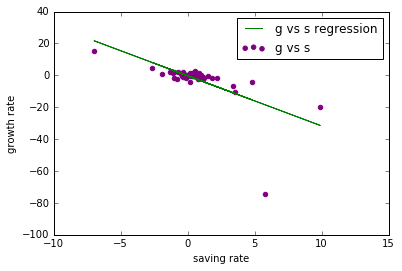

The regression of g against s is -0.250330120865+(-3.14519269359)*x


In [13]:
saving_growth()

From above, we can see the estimated result support our previous answer.

Question 3:

    If we do not consider interest earned due to different timing of tax withhelding, the permanent income will not change. So consumption will not change at all.
    However, if interest is considered, the peremanet income will increase since consumers will earn interest due to less tax withheld. Consumption will increase.